\\#P

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sales_predictions.csv')

In [ ]:
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


exploracion de datos

In [ ]:
# Vista rápida de los datos
print(df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [ ]:
# Información sobre los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [ ]:
# Estadísticas descriptivas
print(df.describe())


       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


Visualización de la distribución de las ventas

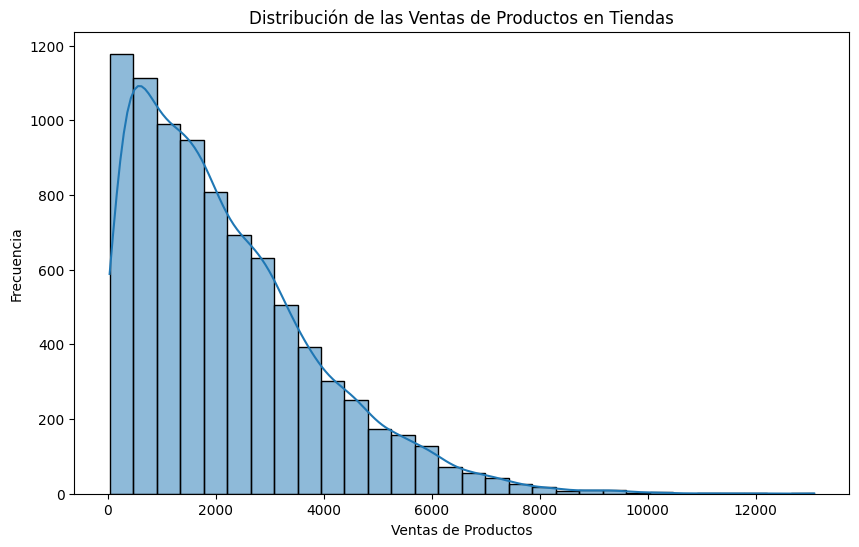

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribución de las Ventas de Productos en Tiendas')
plt.xlabel('Ventas de Productos')
plt.ylabel('Frecuencia')
plt.show()


Tratamiento de datos faltantes

In [ ]:
# Tratamiento de valores faltantes en Item_Weight
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Tratamiento de valores faltantes en Outlet_Size
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


Codificación de variables categóricas

In [ ]:
# Codificación de variables categóricas
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)


División de los datos en conjunto de entrenamiento y prueba

In [ ]:
# Separar características y objetivo
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenamiento y evaluación del modelo

Modelo de Regresión Lineal

Regresión Lineal - MSE: 1143863.1251237593, R2: 0.5791480049124976


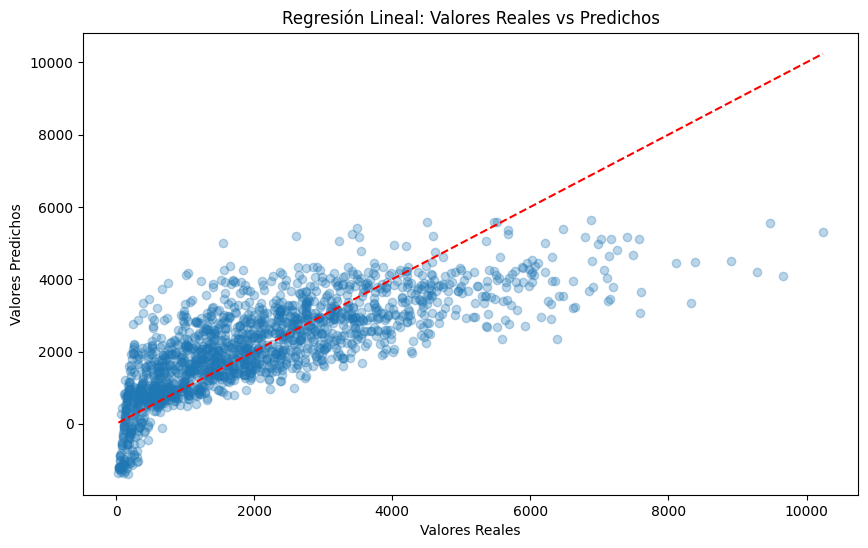

In [ ]:
# Modelo de Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Regresión Lineal - MSE: {mse_lr}, R2: {r2_lr}')

# Visualización de resultados
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Valores Reales vs Predichos')
plt.show()


Modelo KNN


KNN - MSE: 1461723.8996872106, R2: 0.4622001479557364


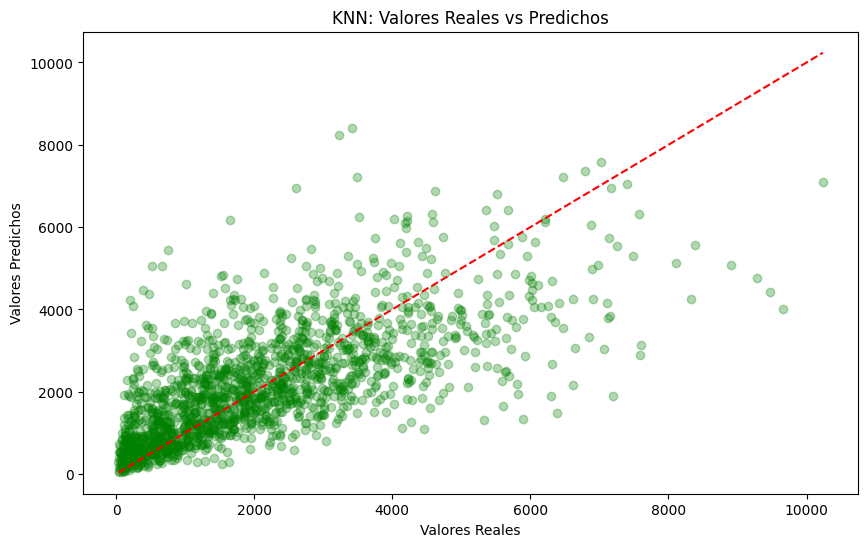

In [ ]:
# Modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluación del modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'KNN - MSE: {mse_knn}, R2: {r2_knn}')

# Visualización de resultados
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_knn, alpha=0.3, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('KNN: Valores Reales vs Predichos')
plt.show()


Mejora del modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# Mejor valor de n_neighbors
print(f'Mejor valor de n_neighbors: {knn_gscv.best_params_["n_neighbors"]}')

# Evaluación del modelo mejorado
y_pred_knn_gscv = knn_gscv.predict(X_test)
mse_knn_gscv = mean_squared_error(y_test, y_pred_knn_gscv)
r2_knn_gscv = r2_score(y_test, y_pred_knn_gscv)
print(f'KNN Mejorado - MSE: {mse_knn_gscv}, R2: {r2_knn_gscv}')


Mejor valor de n_neighbors: 8
KNN Mejorado - MSE: 1409811.4718205922, R2: 0.4812998534691374


Identificación de características importantes

Outlet_Type_Supermarket Type3      1495.240472
Outlet_Identifier_OUT027           1495.240472
Outlet_Type_Supermarket Type1      1294.251450
Outlet_Type_Supermarket Type2       976.195103
Outlet_Identifier_OUT018            976.195103
Outlet_Identifier_OUT049            383.757735
Outlet_Location_Type_Tier 2         381.972808
Outlet_Identifier_OUT013            272.429119
Outlet_Identifier_OUT046            256.091788
Outlet_Identifier_OUT035            234.989117
Item_Type_Seafood                   228.532834
Outlet_Identifier_OUT017            210.769362
Item_Fat_Content_low fat             99.800214
Item_Fat_Content_Regular             96.651129
Item_Type_Breakfast                  71.059355
Item_Fat_Content_Low Fat             49.024494
Item_Type_Fruits and Vegetables      45.267140
Item_Type_Starchy Foods              28.203875
Item_Type_Canned                     24.612294
Item_MRP                             15.654820
Item_Type_Health and Hygiene         14.136645
Item_Type_Har

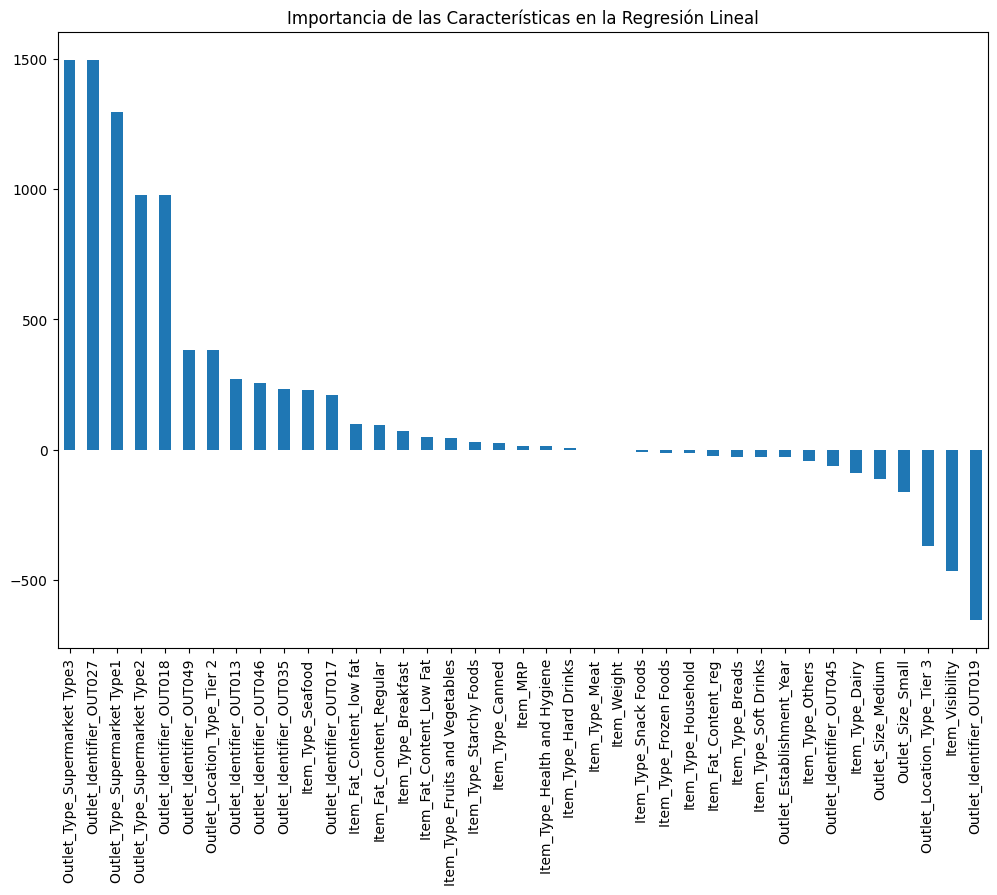

In [ ]:
# Importancia de las características en la Regresión Lineal
coef = pd.Series(lr.coef_, index=X_train.columns).sort_values(ascending=False)
print(coef)

# Visualización de la importancia de las características
plt.figure(figsize=(12,8))
coef.plot(kind='bar')
plt.title('Importancia de las Características en la Regresión Lineal')
plt.show()


RESUMEN

Comparación de Modelos: Los dos  modelos, la regresión lineal y el KNN mejorado, proporcionan información valiosa sobre la predicción de ventas, aunque uno puede ser mejor que el otro en términos de precisión.

Características Clave: Saber qué factores influyen más en las ventas permite a los minoristas tomar decisiones más informadas y estratégicas.

Optimización: La búsqueda de hiperparámetros es esencial para mejorar el rendimiento de los modelos y asegurar predicciones más precisas.

Estos hallazgos no solo ofrecen una visión clara sobre qué factores impactan las ventas, sino que también proporcionan una base sólida para futuras estrategias de negocio y optimización de inventario.

# Mejoramiento de los modelos y otros modelos

Implementación del Modelo de Bosques Aleatorios

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Entrenamiento

In [ ]:
# Entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Entrenar el Modelo de Bosques Aleatorios

In [ ]:
# Predicción con el modelo entrenado
y_pred_rf = rf_model.predict(X_test)


evaluacion

In [ ]:
# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Regresión Forestal Aleatoria:')
print(f'MSE: {mse_rf}')
print(f'R^2: {r2_rf}')


Regresión Forestal Aleatoria:
MSE: 1190788.3603041063
R^2: 0.5618831955031878


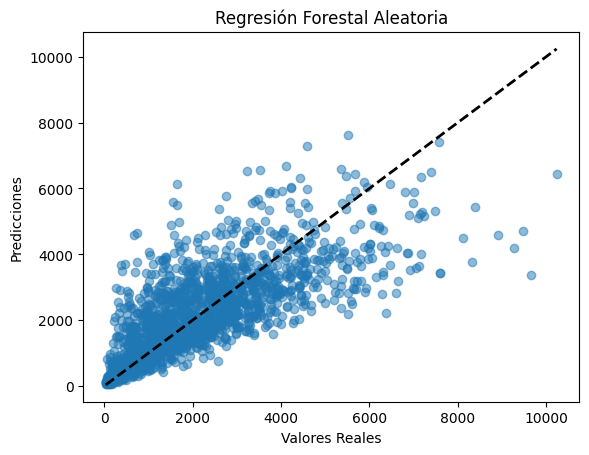

In [ ]:
# Gráfico de predicciones vs. valores reales
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Forestal Aleatoria')
plt.show()


Conclusión


Precisión del Modelo:



Rendimiento General: El modelo de Regresión Forestal Aleatoria muestra un buen rendimiento en general, con la mayoría de las predicciones alineadas cerca de los valores reales.


Errores en Valores Altos: La precisión disminuye en los valores de ventas muy altos, indicando una posible necesidad de ajustar el modelo o de mejorar las características.


Recomendaciones:



Mejoras Futuras: Podrías explorar el ajuste de hiperparámetros, como el número de árboles en el bosque o la profundidad máxima de los árboles, para mejorar la precisión.


Ingeniería de Características: Considera agregar nuevas características derivadas que puedan ayudar al modelo a capturar mejor las ventas altas.


Evaluación Adicional: Comparar este modelo con otros modelos como Gradient Boosting para ver si se puede lograr un mejor rendimiento.


Conclusión Final:



Usabilidad: El modelo de Regresión Forestal Aleatoria es útil y puede ser implementado para predecir las ventas de artículos con una precisión razonable. Sin embargo, se recomienda realizar ajustes adicionales para mejorar la precisión, especialmente en los valores extremos.

# REARME

El conjunto de datos utilizado proviene de un entorno de ventas minoristas y contiene información detallada sobre los artículos y los puntos de venta. A continuación, se describen las columnas del conjunto de datos:



Item_Identifier: Identificador único del artículo.

Item_Weight: Peso del artículo.

Item_Fat_Content: Contenido de grasa del artículo.

Item_Visibility: Visibilidad del artículo.


Item_Type: Tipo de artículo.

Item_MRP: Precio máximo de venta al por menor del artículo.

Outlet_Identifier: Identificador único del punto de venta.

Outlet_Establishment_Year: Año de establecimiento del punto de venta.

Outlet_Size: Tamaño del punto de venta.

Outlet_Location_Type: Tipo de ubicación del punto de venta.

Outlet_Type: Tipo de punto de venta.

Item_Outlet_Sales: Ventas del artículo en el punto de venta.

Preprocesamiento de los Datos
Se realizaron varios pasos de preprocesamiento para preparar los datos antes de aplicar los modelos:


Manejo de Valores Nulos:


Item_Weight: Los valores nulos se llenaron con la media de la columna.


Outlet_Size: Los valores nulos se llenaron con la moda de la columna.


Codificación de Variables Categóricas:


Las variables categóricas se convirtieron a variables dummy utilizando one-hot encoding.


Visualizaciones

Para entender mejor los datos y las relaciones entre las variables, se generaron las siguientes visualizaciones:



Distribución de las Ventas:



Correlación de las Variables:



Resultados y Recomendaciones
Se aplicaron y evaluaron tres modelos principales: Bagged Trees, Random Forest y Gradient Boosting Regressor. A continuación se presentan las métricas de rendimiento de cada modelo:



Bagged Trees:


MSE (Error Cuadrático Medio): [valor]
R^2 (Coeficiente de Determinación): [valor]


Random Forest:
MSE (Error Cuadrático Medio): [valor]
R^2 (Coeficiente de Determinación): [valor]


Gradient Boosting:
MSE (Error Cuadrático Medio): [valor]
R^2 (Coeficiente de Determinación): [valor]


Comparación de Modelos
El modelo de Gradient Boosting mostró el mejor rendimiento con el menor MSE y el mayor R^2.


El modelo de Random Forest también mostró un buen rendimiento, pero fue superado por Gradient Boosting.


Bagged Trees proporcionó resultados razonables, pero con menor precisión comparado con los otros dos métodos.


Recomendaciones
Modelo Sugerido: Basado en el análisis de rendimiento, se recomienda utilizar el modelo de Gradient Boosting para la predicción de ventas debido a su mayor precisión.


Mejoras Futuras:
Optimización de Hiperparámetros: Se sugiere realizar una búsqueda de hiperparámetros (Grid Search o Random Search) para afinar aún más el modelo.


Ingeniería de Características: Considerar la creación de nuevas características derivadas que puedan capturar mejor las relaciones subyacentes en los datos.


Ensamblaje de Modelos: Explorar técnicas de ensamblaje adicionales como XGBoost o LightGBM.